In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [80]:
df.shape

(39717, 111)

#### Removing columns where all rows are NA

In [81]:
df = df.drop(axis=1, columns = df.columns[df.isna().all()].tolist())

In [82]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Data Cleaning

#### Fixing columns where entry count is not 39717

In [84]:
df['emp_length'] = df['emp_length'].fillna(0)
df['emp_title'] = df['emp_title'].fillna('Unknown')


#### Dropping unnecessary columns

In [85]:
# dropping desc, tax_liens (all values are 0),id,
# next_pymnt_d - only 1140 values are present
# chargeoff_within_12_mths - all values are 0
# pymnt_plan - all values are n
# out_prncp - most values are 0
# out_prncp_inv - most values are 0
# pub_rec_bankruptcies - most values are 0
# acc_now_delinq - all values are 0
# delinq_amnt - all values are 0
# initial_list_status - all values are f
# policy_code - all values are 1
# collections_12_mths_ex_med - all values are 0
# emp_title - 2459 unique values
# application_type - all values are individual
# delinq_2yrs - 32000 values are 0
# pub_rec - 34000 values are 0
df = df.drop(labels=['desc', 'tax_liens', 'id', 'url', 'title', 'zip_code', 'mths_since_last_delinq',
                     'mths_since_last_record','next_pymnt_d', 'chargeoff_within_12_mths', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 
                     'pub_rec_bankruptcies', 'acc_now_delinq', 'delinq_amnt', 'initial_list_status', 
                     'policy_code', 'collections_12_mths_ex_med', 'emp_title', 'application_type', 'delinq_2yrs', 
                     'pub_rec'], axis=1)   


#### Dropping redundant rows

In [86]:
# last_credit_pull_d - has 2 missing values - so deleting the rows
# revol_util - has 50 missing values - so deleting the rows
df = df[df['last_credit_pull_d'].notna()]
df = df[df['revol_util'].notna()]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39665 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39665 non-null  int64  
 1   loan_amnt                39665 non-null  int64  
 2   funded_amnt              39665 non-null  int64  
 3   funded_amnt_inv          39665 non-null  float64
 4   term                     39665 non-null  object 
 5   int_rate                 39665 non-null  object 
 6   installment              39665 non-null  float64
 7   grade                    39665 non-null  object 
 8   sub_grade                39665 non-null  object 
 9   emp_length               39665 non-null  object 
 10  home_ownership           39665 non-null  object 
 11  annual_inc               39665 non-null  float64
 12  verification_status      39665 non-null  object 
 13  issue_d                  39665 non-null  object 
 14  loan_status              39

#### Looking into object dtypes which should be numeric or float

In [88]:
# term can be converted to int
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [89]:
# int_rate can be converted to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.split('%')[0]))

In [90]:
# revol_util can be converted to float
df['revol_util'] = df['revol_util'].apply(lambda x: float(x.split('%')[0]))


In [91]:
df.to_csv('cleaned_loan.csv', index=False)

#### Removing outliers (we came to this while doing univariate analysis)

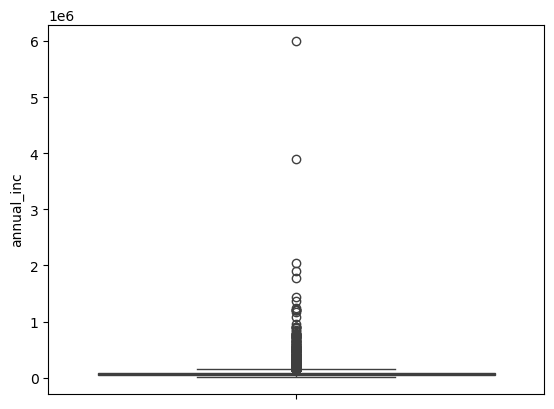

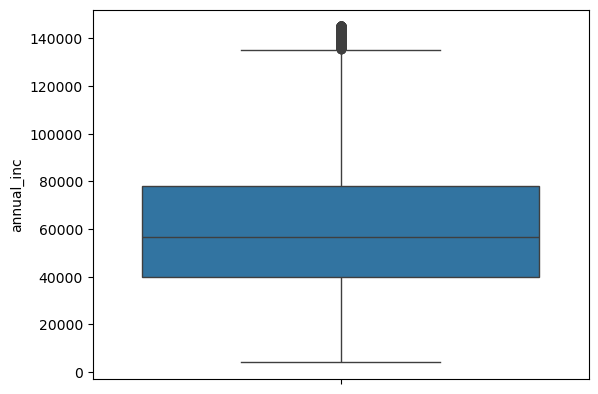

In [92]:
# There's a possibility of outliers in annual_inc, came to know while doing univariate analysis

sns.boxplot(df['annual_inc'])
plt.show()

# Let's remove the outliers

q1 = df['annual_inc'].quantile(0.25)
q3 = df['annual_inc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['annual_inc'] > lower_bound) & (df['annual_inc'] < upper_bound)]

sns.boxplot(df['annual_inc'])
plt.show()

#### Distribute based on defaulters, non-defaulters and current

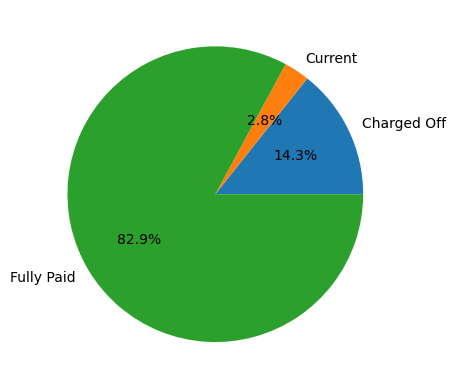

In [93]:
grouped_loadstatus = df.groupby('loan_status')['member_id'].count()
plt.pie(grouped_loadstatus, labels=grouped_loadstatus.index, autopct='%1.1f%%')
plt.show()

#### Getting rid of 2.9% of people who are currently paying off the loan

In [94]:
df = df[df['loan_status'] != 'Current']

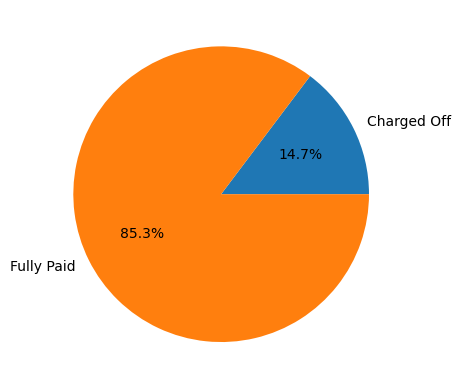

In [95]:
plt.pie(df.groupby('loan_status')['member_id'].count(), labels=df.groupby('loan_status')['member_id'].count().index, autopct='%1.1f%%')
plt.show()

14.6% of total people have defaulted,

we need to find out what defaulters have or do different than the people who fully pay their loan

In [96]:
defaulters = df[df['loan_status'] == 'Charged Off']
non_defaulters = df[df['loan_status'] == 'Fully Paid']

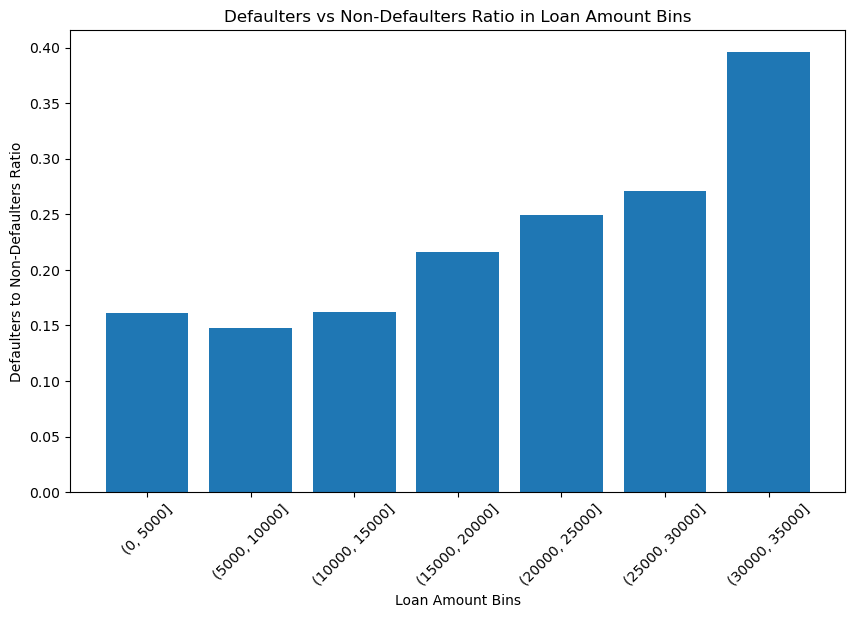

In [97]:
# Based on the loan amount

# Create bins for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

# Group defaulters and non-defaulters by loan amount bins
defaulters_bins = defaulters.groupby(pd.cut(defaulters['loan_amnt'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['loan_amnt'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin
ratio = defaulters_bins / fullypaid_bins

# Plot the ratio
plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Loan Amount Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Loan Amount Bins')
plt.xticks(rotation=45)
plt.show()


##### We notice that ratio of defaulters increase as the loan amount increases

[0.1258305  0.34613077]
[36 60]


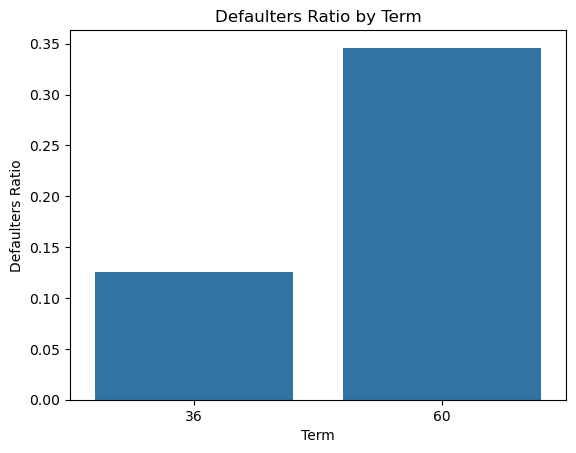

In [98]:

# Calculate defaulters/non_defaulters ratio for each term
defaulters_ratio = defaulters.groupby('term').size() / non_defaulters.groupby('term').size()
print(defaulters_ratio.values)
print(df['term'].unique())

# Plotting the bar plot
sns.barplot(x=defaulters_ratio.index, y=defaulters_ratio.values)
plt.xlabel('Term')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Term')
plt.show()

We notice that as term increases the number of defaulters to non-defaulters ratio also increases
This means that higher the term the higher the defaulters number

In [99]:
# based on interest rate
defaulters['int_rate'].value_counts().sort_index()

int_rate
5.42     20
5.79     16
5.99     19
6.03      5
6.17     10
         ..
23.52     4
23.59     1
23.91     1
24.11     1
24.40     1
Name: count, Length: 327, dtype: int64

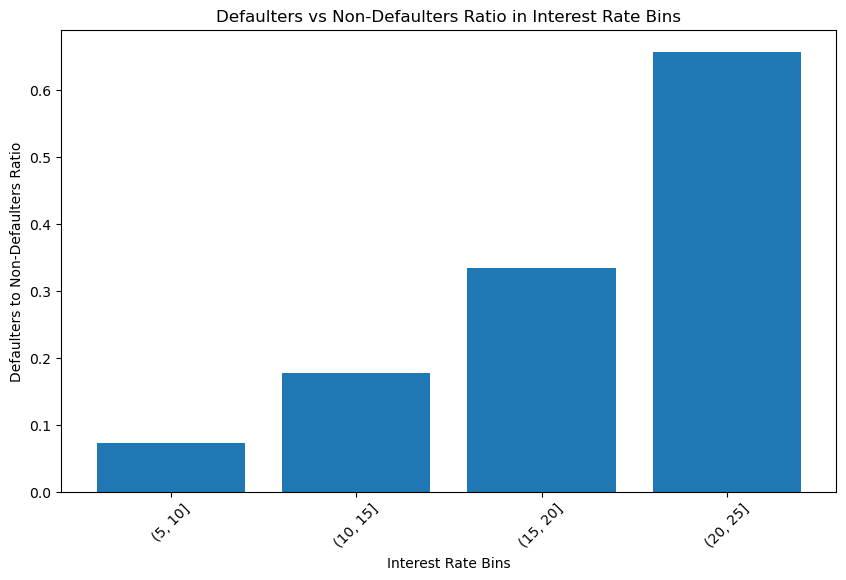

In [100]:
bins = [0, 5, 10, 15, 20, 25]
defaulters_bins = defaulters.groupby(pd.cut(defaulters['int_rate'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['int_rate'], bins)).size()

ratio = defaulters_bins / fullypaid_bins

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Interest Rate Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Interest Rate Bins')
plt.xticks(rotation=45)
plt.show()

We observe that ratio of defaulters also increases as interest rate increases.

Therefore we can say higher the interest rate higher the chances of defaulting

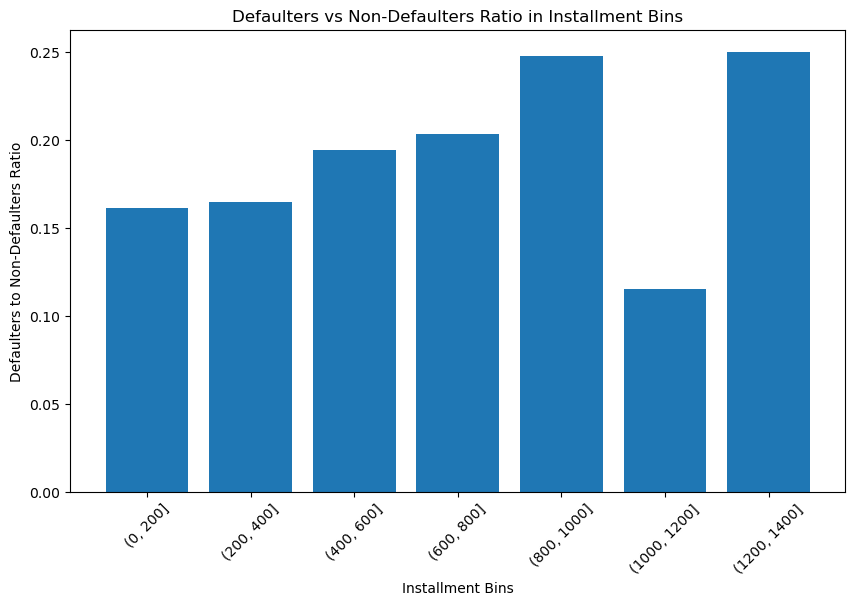

In [101]:
# based on installment
df['installment'].value_counts().sort_index()
# we see values from 15.69 to 1305.19
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
defaulters_bins = defaulters.groupby(pd.cut(defaulters['installment'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['installment'], bins)).size()

ratio = defaulters_bins / fullypaid_bins

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Installment Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Installment Bins')
plt.xticks(rotation=45)
plt.show()




We notice a trend for installment and defaulters ratio go hand in hand till 1000, but then there is a dip.
This might be due to outliers

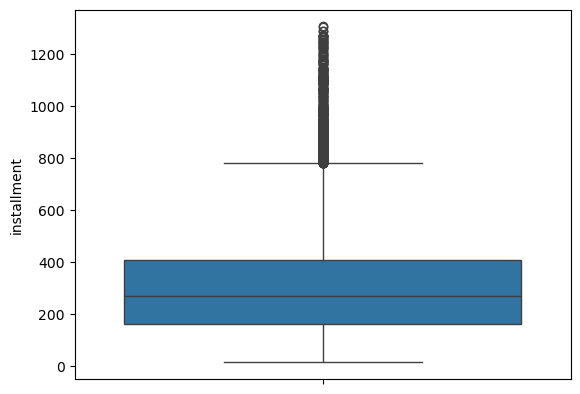

In [102]:
# Let's see if there are outliers in installment, we came to this conclusion while doing segmented univariate analysis on installment
sns.boxplot(df['installment'])
plt.show()

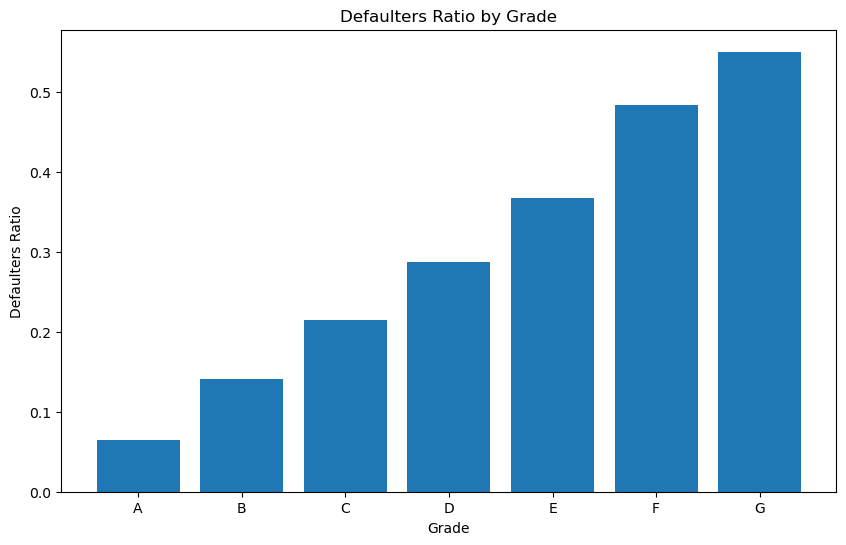

In [103]:
# Let's analyze for grade

# Create a pivot table
pivot = df.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters
pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Grade')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Grade')
plt.show()


We observe that the defaulters rate increases as the grade increases

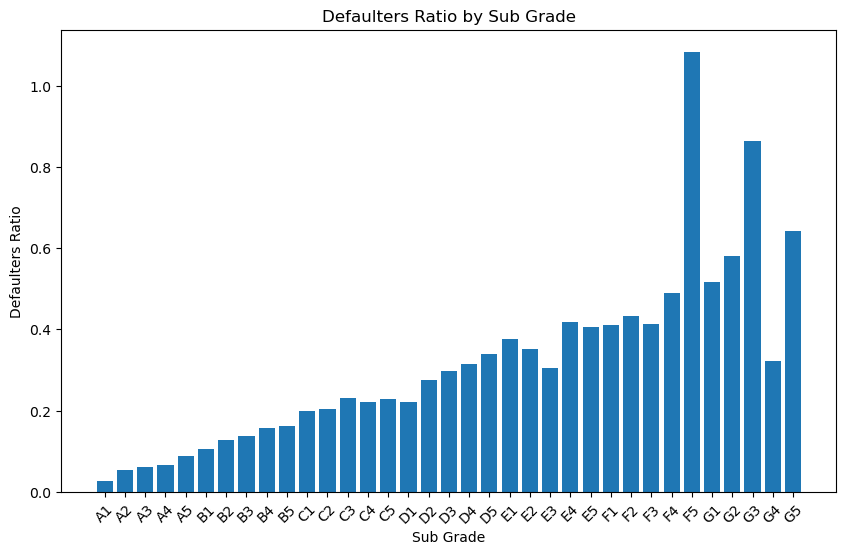

In [104]:
# Let's analyze for sub_grade

# Create a pivot table
pivot = df.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters
pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Sub Grade')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Sub Grade')
plt.xticks(rotation=45)
plt.show()

We observe the trend that defaulters increase as sub-grade moves from A1 to G5

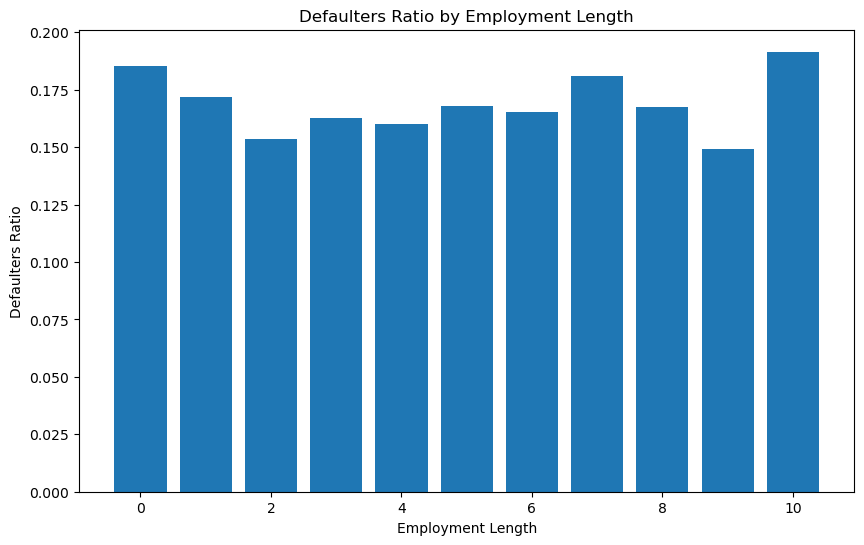

In [105]:
# Let's clean emp_length

df['emp_length'].value_counts()

# Replace < 1 year with 0
df['emp_length'] = df['emp_length'].apply(lambda x: 0 if x == '< 1 year' else x)

# Replace 10+ years with 10
df['emp_length'] = df['emp_length'].apply(lambda x: 10 if x == '10+ years' else x)

df['emp_length'] = df['emp_length'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

df['emp_length'].value_counts()

# Let's analyze for emp_length

# Create a pivot table

pivot = df.pivot_table(index='emp_length', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Employment Length')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Employment Length')
plt.show()


We observe no corellation between defaulters and the length of their employment

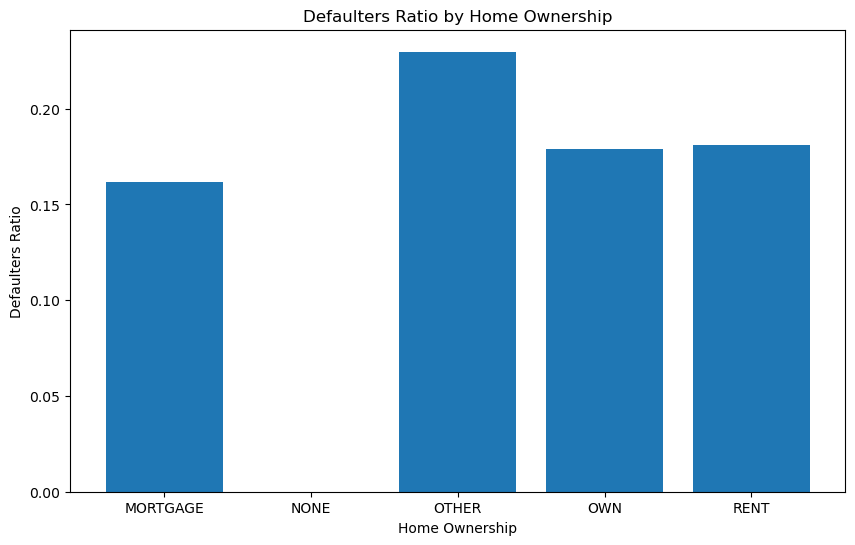

In [106]:
# Let's analyse for home_ownership

# Create a pivot table
pivot = df.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Home Ownership')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Home Ownership')
plt.show()


We notice no relation with home ownership and defaulters except that "Other" section has more of defaulters. But we don't know what values Others have in it

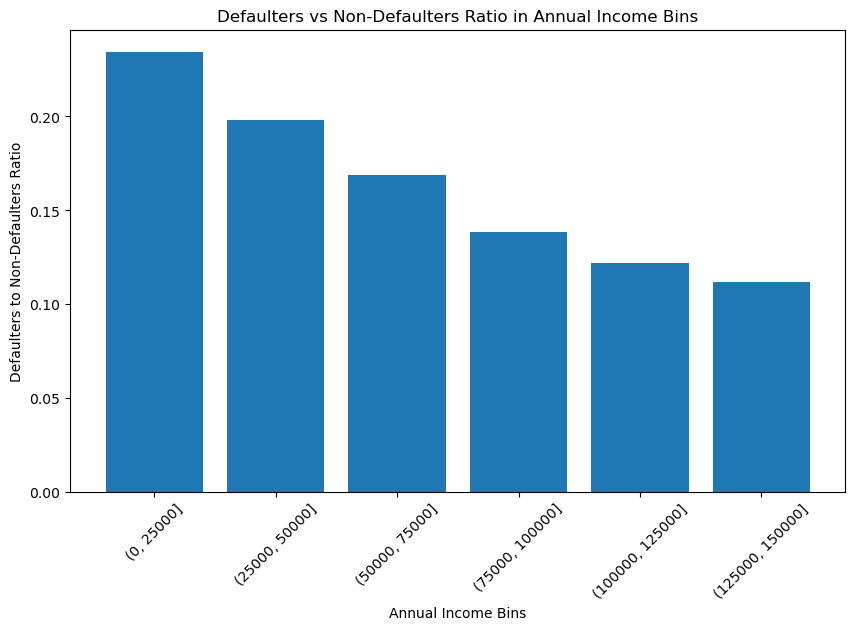

In [107]:
# Create bins for annual_inc

bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]

# Group defaulters and non-defaulters by annual_inc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['annual_inc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['annual_inc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Annual Income Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Annual Income Bins')
plt.xticks(rotation=45)
plt.show()

We observe as annual salary increases ratio of defaulters decreases. There is a co-relation between salary and defaulters

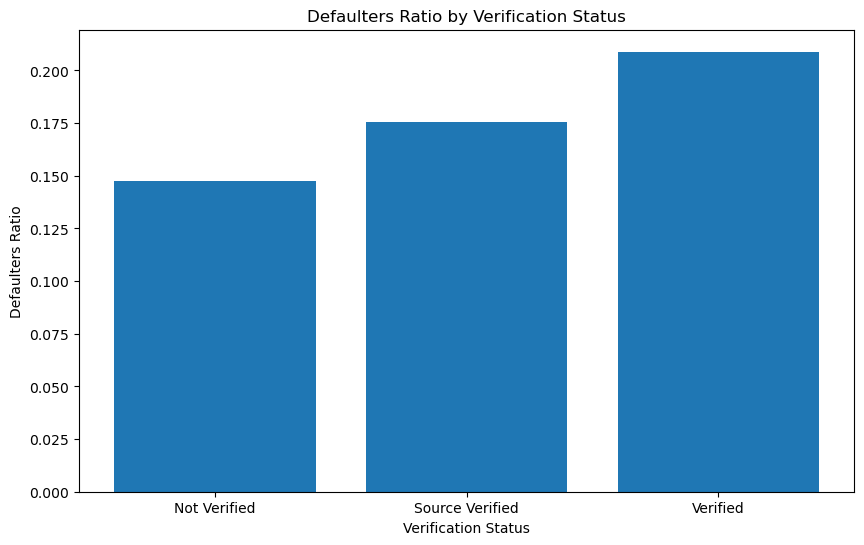

In [108]:
# Let's analyze for verification_status

# Create a pivot table

pivot = df.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Verification Status')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Verification Status')

plt.show()

We observe that defaulters rate decreases for verified annual income.

In [109]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

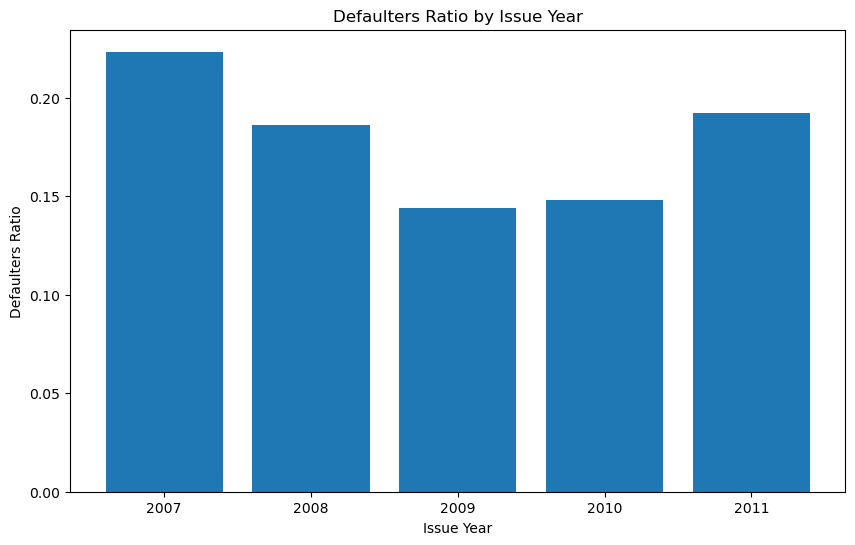

In [110]:
# Create a pivot table for issue year

pivot = df.pivot_table(index='issue_year', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Issue Year')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Issue Year')
plt.show()

No relation with issue year and defaulters

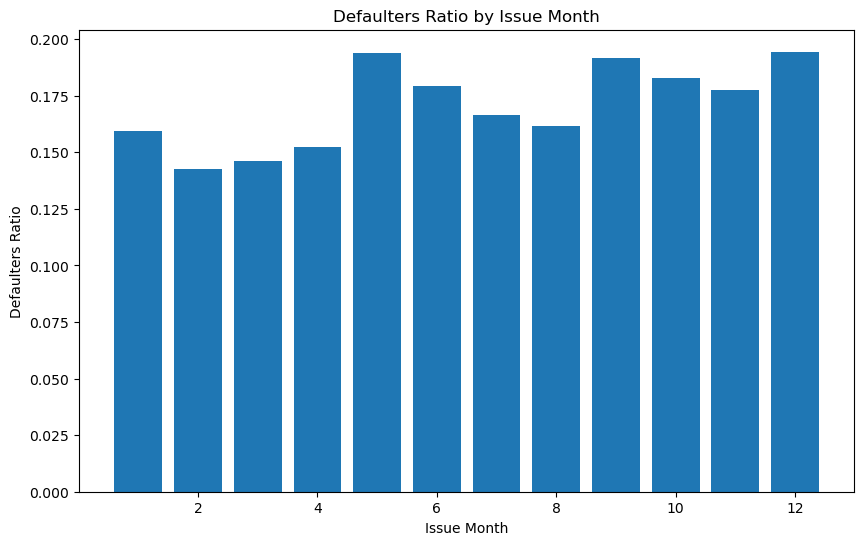

In [111]:
# Create a pivot table for issue month

pivot = df.pivot_table(index='issue_month', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Issue Month')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Issue Month')
plt.show()

No relation with issue month and defaulters

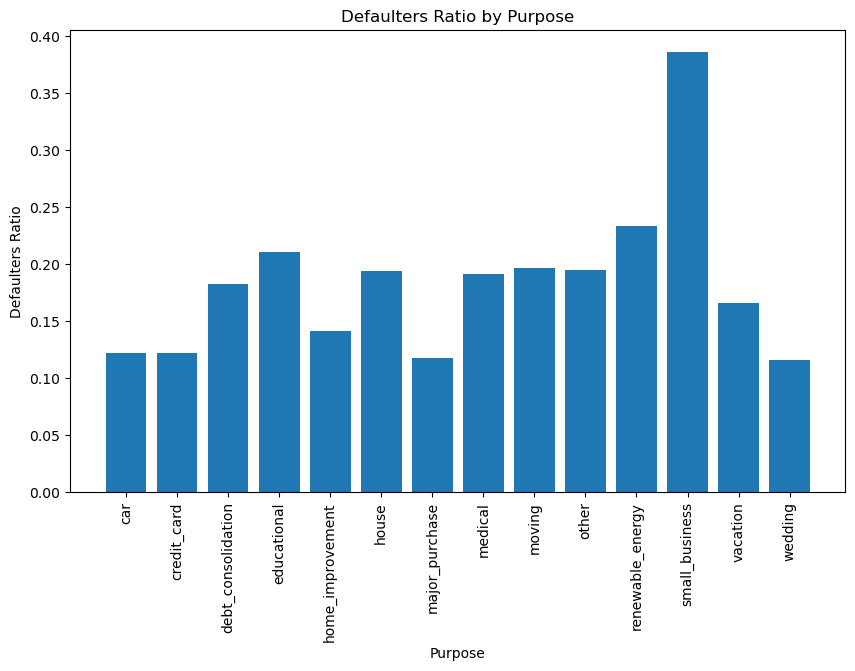

In [112]:
# Let's analyze for purpose

# Create a pivot table

pivot = df.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))

plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Purpose')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose')
plt.xticks(rotation=90)
plt.show()


We observe that members who have taken loan for small business tend to default more about 40%

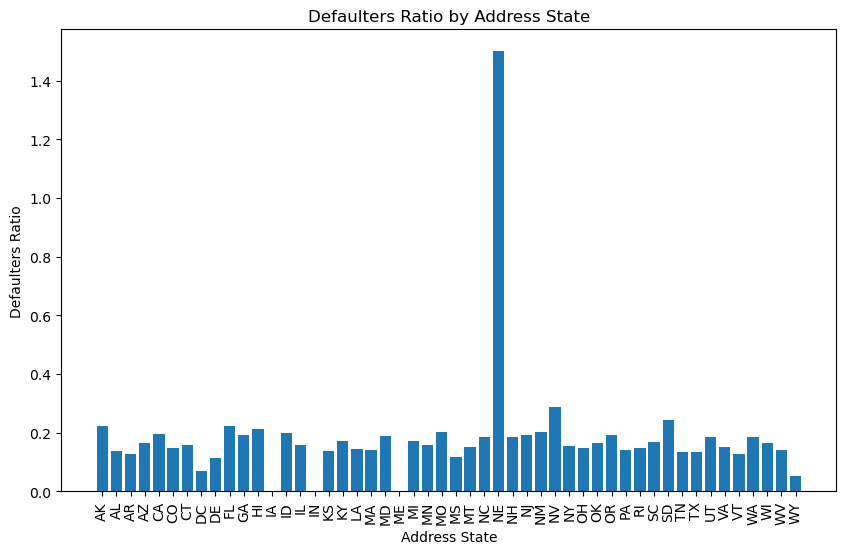

In [113]:
# Let's analyze for addr_state

# Create a pivot table

pivot = df.pivot_table(index='addr_state', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Address State')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Address State')
plt.xticks(rotation=90)
plt.show()

We observe that members from the state of NE have the highest defaulters ratio.

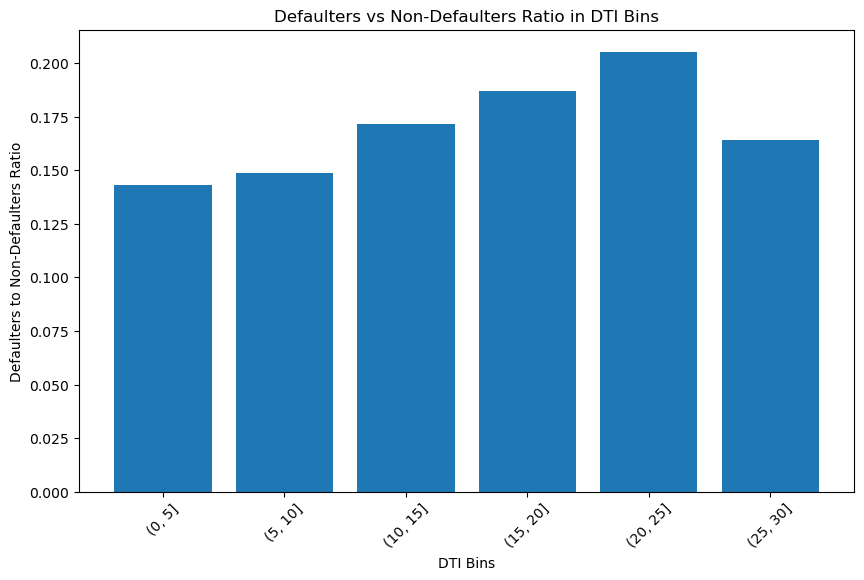

In [114]:
# Let's analyze for dti

df['dti'].value_counts().sort_index()   

# Create bins for dti

bins = [0, 5, 10, 15, 20, 25, 30]

# Group defaulters and non-defaulters by dti bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['dti'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['dti'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('DTI Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in DTI Bins')
plt.xticks(rotation=45)
plt.show()

we observe a trend that defaulters increase as dti increases

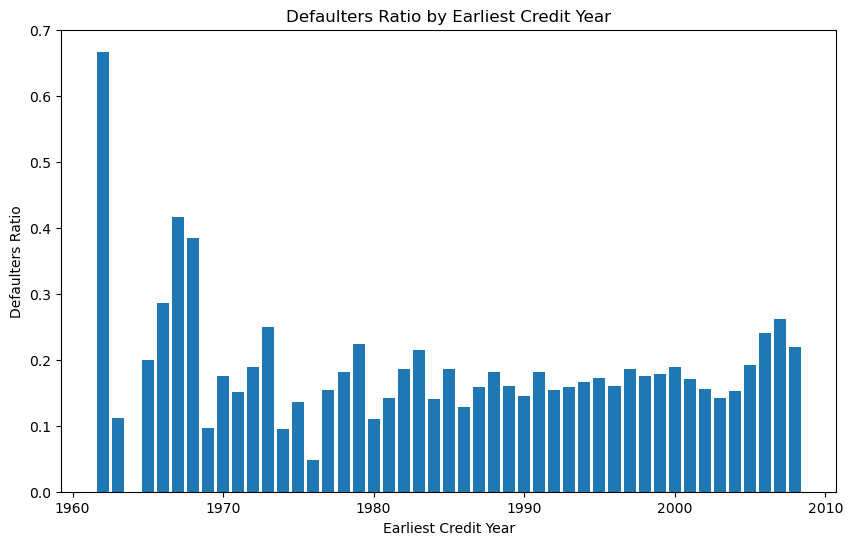

In [115]:
# Let's analyze for earliest_cr_line

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df.loc[df['earliest_cr_line'].dt.year >= 2020, 'earliest_cr_line'] -= pd.DateOffset(years=100)

df['earliest_cr_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year

# Create a pivot table for earliest_cr_year

pivot = df.pivot_table(index='earliest_cr_year', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Earliest Credit Year')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Earliest Credit Year')
plt.show()


We don't see any relation between year and earliest_cr_line. Only that in 196x we see high defaulters once

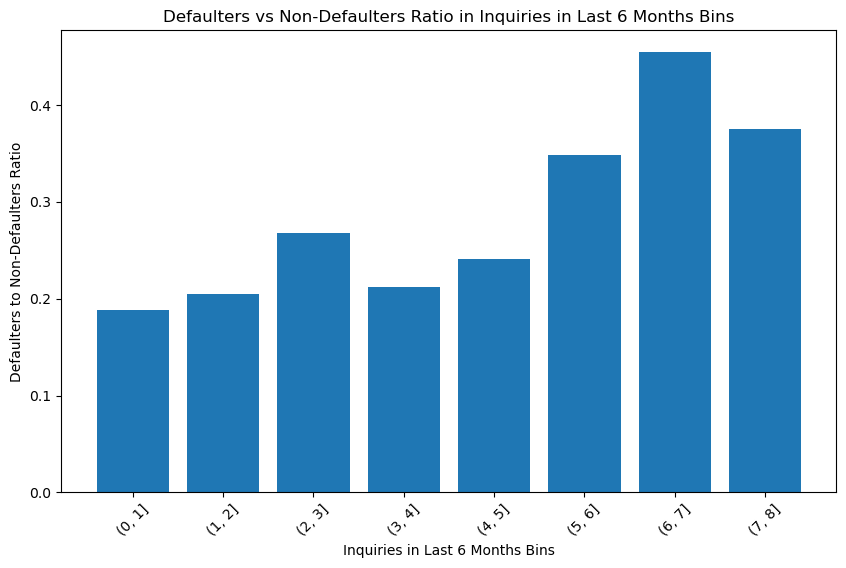

In [116]:
# Let's analyze for inq_last_6mths

df['inq_last_6mths'].value_counts().sort_index()

# Create bins for inq_last_6mths

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Group defaulters and non-defaulters by inq_last_6mths bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['inq_last_6mths'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['inq_last_6mths'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Inquiries in Last 6 Months Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Inquiries in Last 6 Months Bins')
plt.xticks(rotation=45)
plt.show()



No relation between inq_last_6mths and defaulters

<Axes: ylabel='open_acc'>

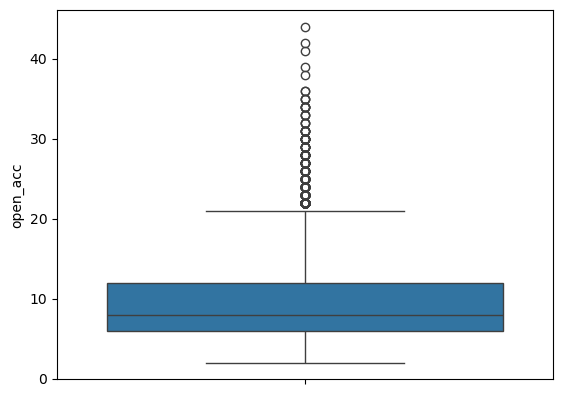

In [117]:
# Let's analyze for open_acc

df['open_acc'].value_counts().sort_index()

# Look for outliers in open_acc

sns.boxplot(df['open_acc'])

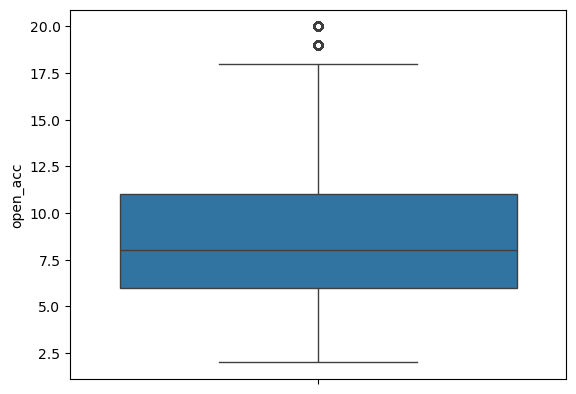

In [118]:
# Remove outliers in open_acc

q1 = df['open_acc'].quantile(0.25)
q3 = df['open_acc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['open_acc'] > lower_bound) & (df['open_acc'] < upper_bound)]

sns.boxplot(df['open_acc'])
plt.show()

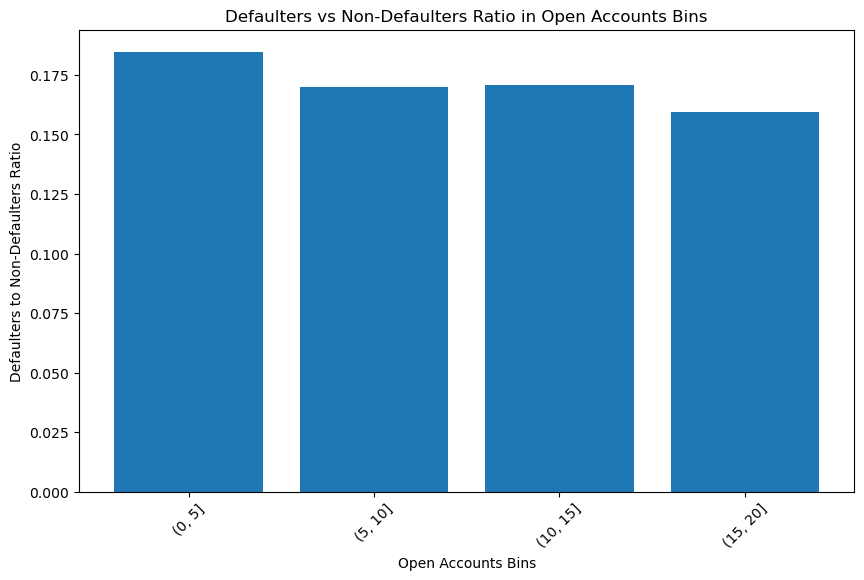

In [119]:

# Create bins for open_acc

bins = [0, 5, 10, 15, 20]

# Group defaulters and non-defaulters by open_acc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['open_acc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['open_acc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Open Accounts Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Open Accounts Bins')
plt.xticks(rotation=45)
plt.show()


No relation between open_acc and defaulter. It's almost constant

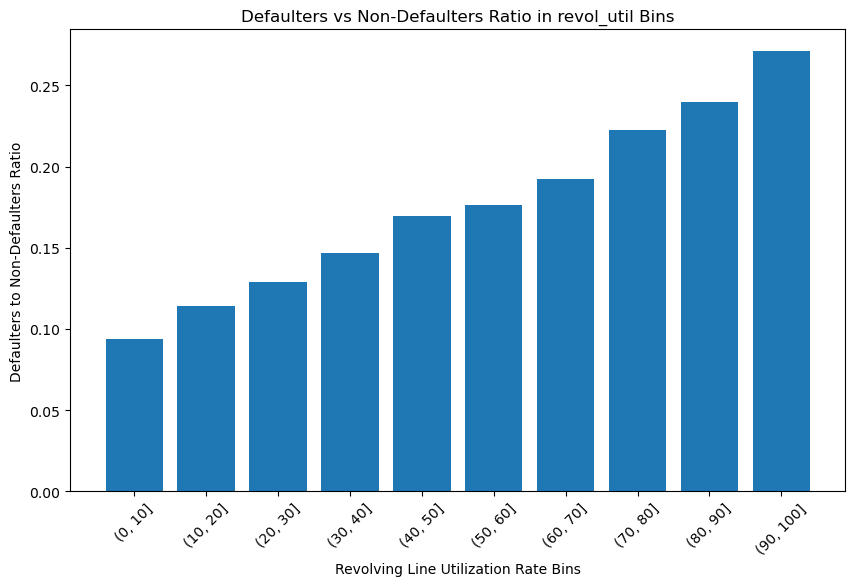

In [120]:
# Let's analyze for revol_util

df['revol_util'].value_counts().sort_index()

# Create bins for revol_util

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Group defaulters and non-defaulters by revol_util bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['revol_util'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['revol_util'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Revolving Line Utilization Rate Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in revol_util Bins')
plt.xticks(rotation=45)
plt.show()


We observe that the defaulters ratio increases as the revol_util increases

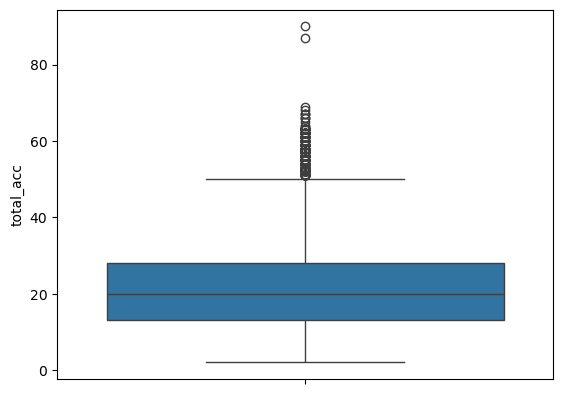

In [121]:
# Let's analyze for total_acc

df['total_acc'].value_counts().sort_index()

# Look for outliers in total_acc

sns.boxplot(df['total_acc'])
plt.show()

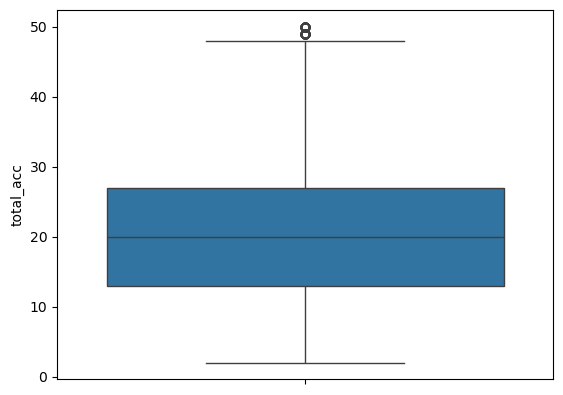

In [122]:
# Remove outliers in total_acc

q1 = df['total_acc'].quantile(0.25)
q3 = df['total_acc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['total_acc'] > lower_bound) & (df['total_acc'] < upper_bound)]

sns.boxplot(df['total_acc'])
plt.show()


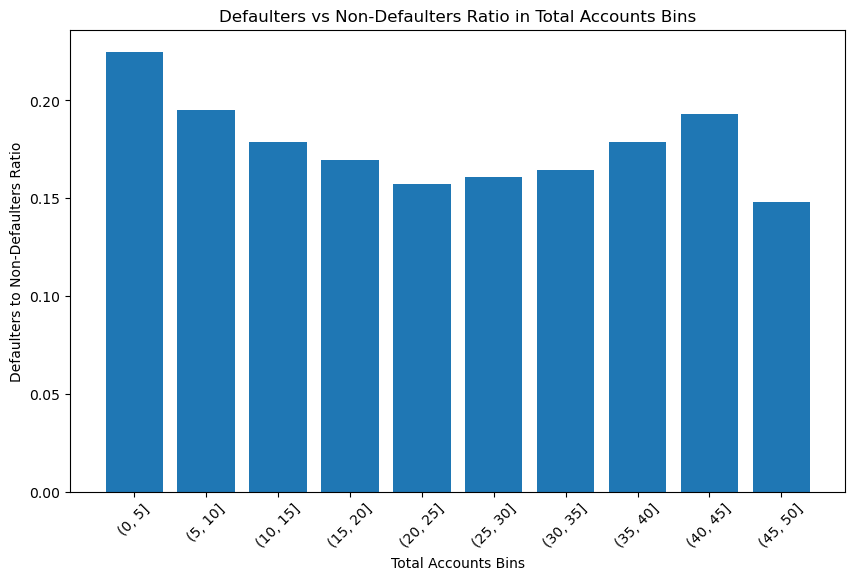

In [123]:

# Create bins for total_acc

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Group defaulters and non-defaulters by total_acc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['total_acc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['total_acc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins


# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Total Accounts Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Total Accounts Bins')
plt.xticks(rotation=45)
plt.show()


No relation between Total account bins and defaulters

In [124]:
# analyze for total_pymnt - can be used for bi-variate analysis


Results of Segmented univariate analysis:

Following columns individually have impact on defaulters

term, interest rate, installment, grade, sub-grade, annual salary, verification status, purpose= small business, state=Nebraska, dti, revol_util

### Bivariate Analysis

Possible options:

- Loan Amount, Term
- Loan Amount, Interest Rate
- Loan Amount, Annual Income
- Term, Purpose
- Term, Interest Rate



           loan_amnt     term
loan_amnt    1.00000  0.35115
term         0.35115  1.00000


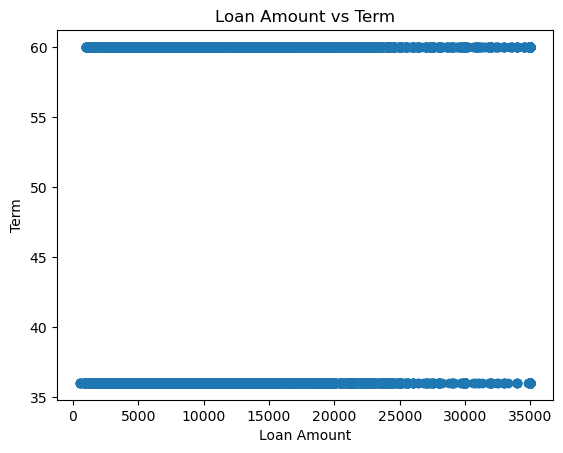

In [127]:
# Let's find correlation between Loan Amount and Term

print(df[['loan_amnt', 'term']].corr())

# Let's plot a scatter plot between Loan Amount and Term

plt.scatter(df['loan_amnt'], df['term'])
plt.xlabel('Loan Amount')
plt.ylabel('Term')
plt.title('Loan Amount vs Term')
plt.show()
